# Support Vector Machine
## 1. Linear SVM

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

加载数据，查看数据形状

In [349]:
data = loadmat('data/ex6data1.mat')
x = data.get('X')
y = data.get('y')
x.shape, y.shape

((51, 2), (51, 1))

数据集可视化

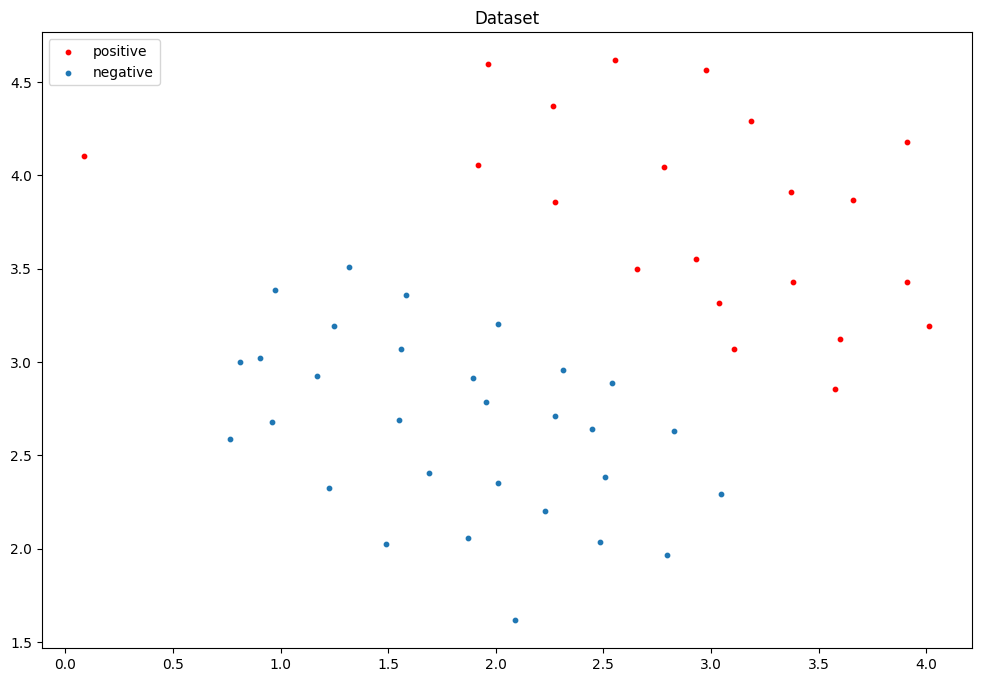

In [350]:
fig, ax = plt.subplots(figsize=(12,8))
positive_data_idx= np.where(y[:,0]==1)
positive_data = x[positive_data_idx]
negative_data_idx= np.where(y[:, 0] == 0)
negative_data = x[negative_data_idx]
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title("Dataset")
plt.legend(loc=2)
plt.show()

C = 100, 100000 Over fitting
C = 1, 1000,ok

In [351]:
from sklearn import svm
svc = svm.LinearSVC(C=1, max_iter=1000)
svc.fit(x,y.ravel())
theta1 = [svc.intercept_[0], svc.coef_[0,0], svc.coef_[0,1]]
theta1

[-3.5631768232388312, 0.44887695596454064, 0.7639782691479051]

决策边界

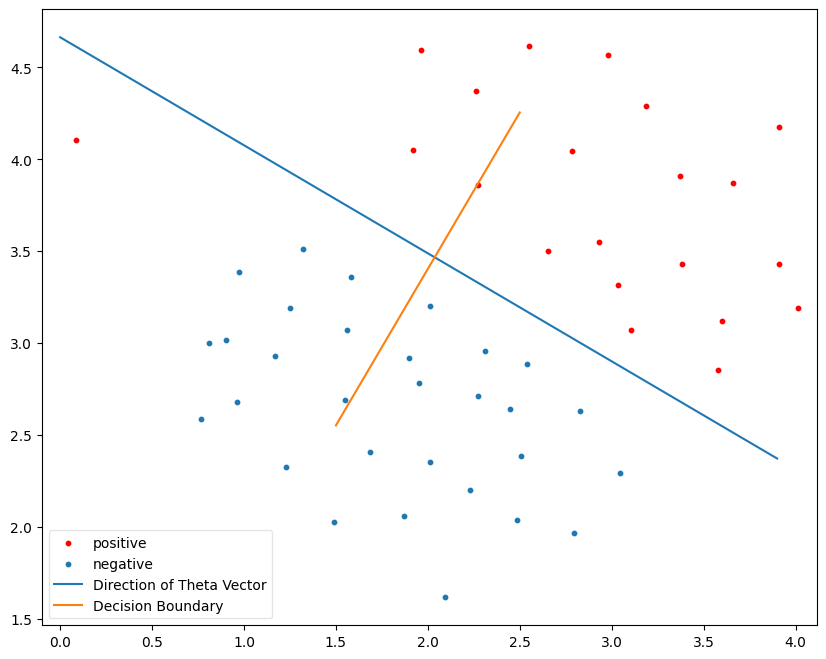

In [352]:
x_ax = np.arange(0, 4, 0.1)
xx = np.array([1.5,2.5])
y_ax = -theta1[0] / theta1[2] + (-theta1[1] / theta1[2])*x_ax
yy = (theta1[2] / theta1[1] )*xx
plt.figure(figsize=(10,8))
plt.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
plt.plot(x_ax, y_ax, label="Direction of Theta Vector")
plt.plot(xx, yy, label="Decision Boundary")
plt.axis('equal')
plt.legend(loc=0,framealpha=0.5)
plt.show()

In [353]:
from sklearn import svm
svc2 = svm.LinearSVC(C=100, max_iter=100000)
svc2.fit(x,y.ravel())
theta2 = [svc2.intercept_[0], svc2.coef_[0,0], svc2.coef_[0,1]]
theta2

[-16.162114522504414, 1.5124551124213403, 3.945207683896826]

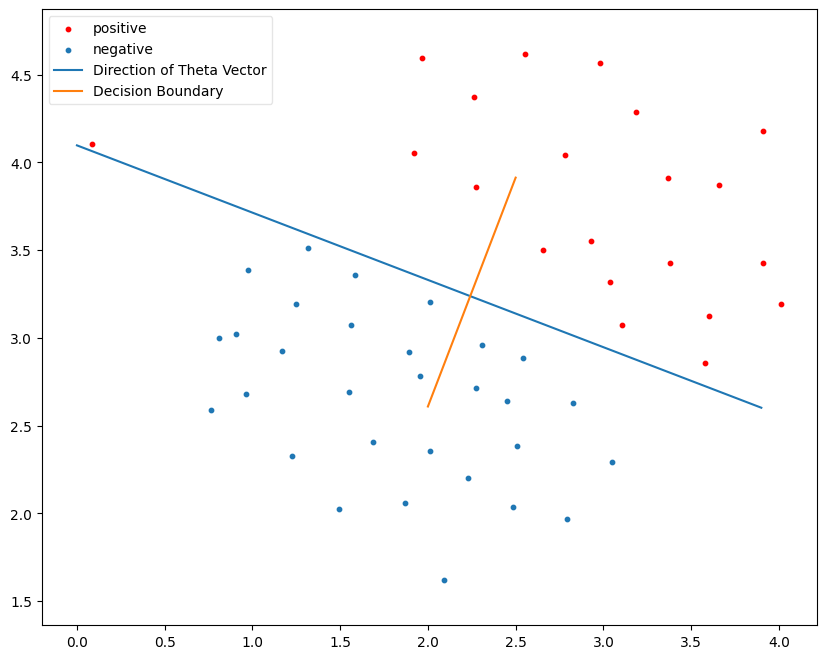

In [354]:
x_ax = np.arange(0, 4, 0.1)

y_ax = -theta2[0] / theta2[2] + (-theta2[1] / theta2[2])*x_ax

plt.figure(figsize=(10,8))
plt.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
plt.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
plt.plot(x_ax, y_ax, label="Direction of Theta Vector")

xx = np.array([1,1.5])
yy = (theta2[2] / theta2[1] )*xx
plt.plot(xx + 1, yy, label="Decision Boundary")

plt.axis('equal')
plt.legend(loc=0,framealpha=0.5)
plt.show()